In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("farm_production_dataset.csv")

In [6]:
df

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208
...,...,...,...,...,...,...,...,...,...
10268,1984,SK,Tame hay,78.00,2870.0,2087000.0,1800000.0,728000.0,162786
10269,1984,SK,"Wheat, all",176.00,1420.0,11485000.0,20000000.0,8094000.0,2026204
10270,1984,SK,"Wheat, durum",188.00,1200.0,1633000.0,3350000.0,1356000.0,307004
10271,1984,SK,"Wheat, spring",175.00,1460.0,9607000.0,16300000.0,6596000.0,1681225


In [7]:
df.dropna(inplace=True)
df

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208
...,...,...,...,...,...,...,...,...,...
10267,1984,SK,Sunflower seed,337.00,510.0,5400.0,26000.0,10500.0,1820
10268,1984,SK,Tame hay,78.00,2870.0,2087000.0,1800000.0,728000.0,162786
10269,1984,SK,"Wheat, all",176.00,1420.0,11485000.0,20000000.0,8094000.0,2026204
10270,1984,SK,"Wheat, durum",188.00,1200.0,1633000.0,3350000.0,1356000.0,307004


In [10]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [14]:
X = df[['Production (metric tonnes)', 'Average farm price (dollars per tonne)']]

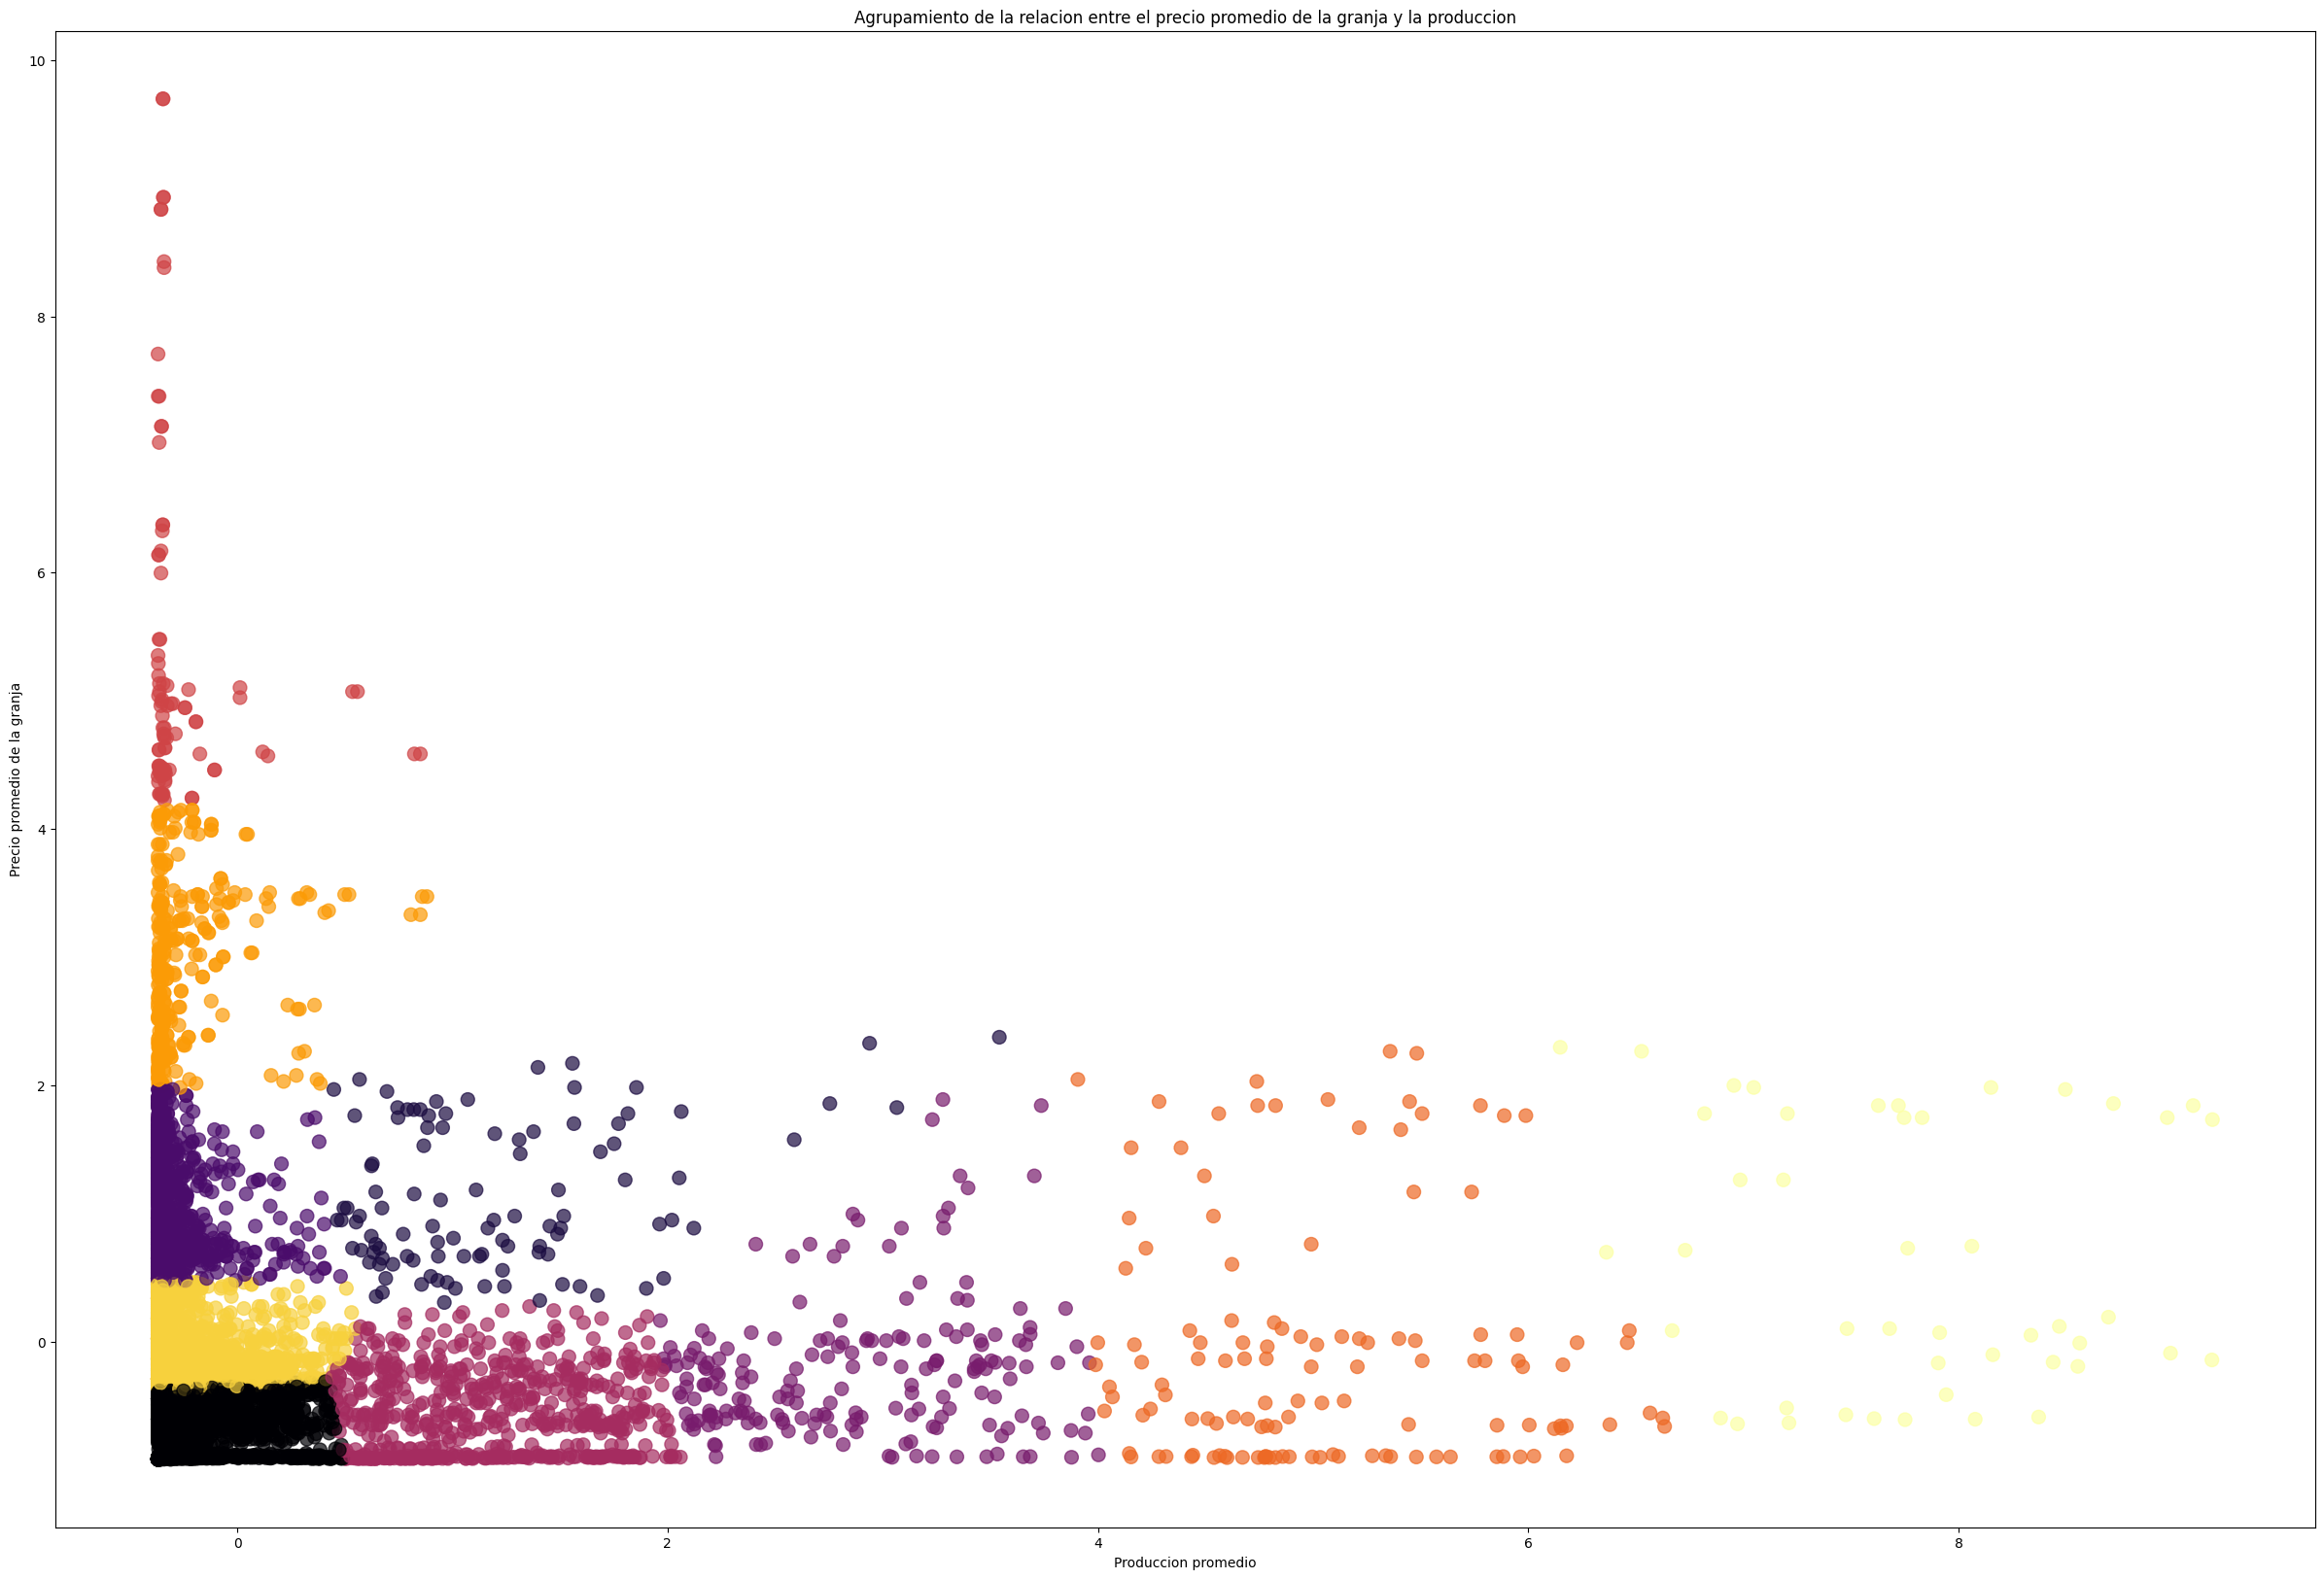

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  clusters = kmeans.labels_
  sse.append(kmeans.inertia_)
df['Cluster'] = clusters
plt.figure(figsize=(30, 20))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='inferno', s=100, alpha=0.7)
plt.title('Agrupamiento de la relacion entre el precio promedio de la granja y la produccion')
plt.ylabel('Precio promedio de la granja')
plt.xlabel('Produccion promedio')
plt.show()
